**Import Pandas**

In [1]:
import pandas as pd

**Import CSV Dataset**

In [2]:
#dataset link - https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
data = pd.read_csv('AB_NYC_2019.csv')

**Rename Column Names**

In [3]:
data.rename({'id':'Listing id', 'name':'Summary', 'host_id':'Host id', 'host_name':'Host name', 'neighbour_hood':'City', 'neighbourhood':'Neighbourhood','latitude':'Latitude','longitude':'Longitude', 'room_type':'Property Type', 'price':'Amount', 'minimum_nights':'Minimum Night Stay ' ,'number_of_reviews':'Reviews','last review':'Latest_Review','reviews_per_month':'Average Monthly Review','calculated_host_listings_count':'Number of Properties per Host', 'availability_365':'Number of Days Property Available '}, axis = 1, inplace = True)

**Check if any null values present in any columns**

In [4]:
data.isnull().any()

Listing id                            False
Summary                                True
Host id                               False
Host name                              True
neighbourhood_group                   False
Neighbourhood                         False
Latitude                              False
Longitude                             False
Property Type                         False
Amount                                False
Minimum Night Stay                    False
Reviews                               False
last_review                            True
Average Monthly Review                 True
Number of Properties per Host         False
Number of Days Property Available     False
dtype: bool

**Replace Null Values with '0'**

In [5]:
data.fillna(value = 0, inplace = True)

**Recheck if Any Null Values**

In [6]:
data.isnull().any()

Listing id                            False
Summary                               False
Host id                               False
Host name                             False
neighbourhood_group                   False
Neighbourhood                         False
Latitude                              False
Longitude                             False
Property Type                         False
Amount                                False
Minimum Night Stay                    False
Reviews                               False
last_review                           False
Average Monthly Review                False
Number of Properties per Host         False
Number of Days Property Available     False
dtype: bool

**Display data upto 60 rows**

In [7]:
data.head(60)

,Listing id,Summary,Host id,Host name,neighbourhood_group,Neighbourhood,Latitude,Longitude,Property Type,Amount,Minimum Night Stay,Reviews,last_review,Average Monthly Review,Number of Properties per Host,Number of Days Property Available
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


**Data cleaning : Amount data should be greater than 0**

In [8]:
data = data[(data.Amount>0)]

# STATISTICS

#### Stats1: Simple statistics

In [9]:
data['Amount'].describe().apply("{0:.5f}".format)

count    48884.00000
mean       152.75505
std        240.17026
min         10.00000
25%         69.00000
50%        106.00000
75%        175.00000
max      10000.00000
Name: Amount, dtype: object

**Stats2: Best performing city in NY**

In [11]:
cityData = data['neighbourhood_group']

dict1 = {}
for idx, row in cityData.items():
    
    if row not in dict1:
        dict1[row] = 1
    else:
        dict1[row] += 1
highest_city = max(dict1, key=dict1.get)
print("Airbnb had maximum listings in {}".format(highest_city))

Airbnb had maximum listings in Manhattan


**Stats 3: Maximum type of Property Rented in Manhattan**

In [13]:
room_type = data.loc[data['neighbourhood_group'] == 'Manhattan', 'Property Type']

dict1 = {}
for idx, row in room_type.items():
    
    if row not in dict1:
        dict1[row] = 1
    else:
        dict1[row] += 1
room_sold = max(dict1, key=dict1.get)
print("The maximum type of property rented was {} and total number was {}".format(room_sold, dict1[room_sold]))

The maximum type of property rented was Entire home/apt and total number was 13198


# HISTOGRAM

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0.5, 1.0, '$ Amount per Transaction')

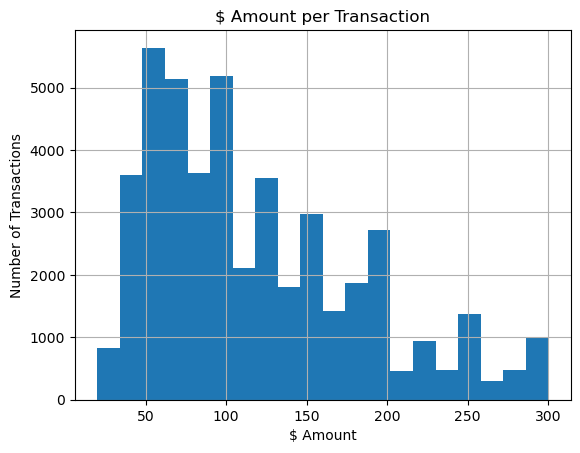

In [15]:
histogram = data.hist('Amount', range=[20, 300], bins = 20)
plt.xlabel('$ Amount')
plt.ylabel('Number of Transactions')
plt.title('$ Amount per Transaction')